/Users/jlanders/CondaProjects/Pyleoclim_util/pyleoclim/utils/wavelet.py:1369: UserWarning: Standardizing the timeseries
  warnings.warn('Standardizing the timeseries')


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


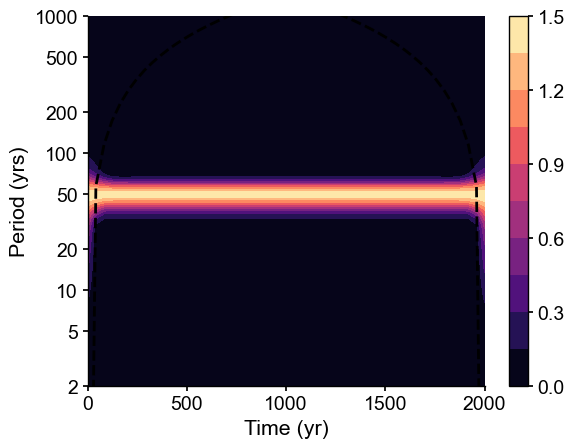

In [1]:
from pyleoclim import utils
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import numpy as np

# Create a signal
time = np.arange(2001)
f = 1/50  # the period is then 1/f = 50
signal = np.cos(2*np.pi*f*time)

# Wavelet Analysis
res = utils.wwz(signal, time)

# Visualization
fig, ax = plt.subplots()
contourf_args = {'cmap': 'magma', 'origin': 'lower', 'levels': 11}
cbar_args = {'drawedges': False, 'orientation': 'vertical', 'fraction': 0.15, 'pad': 0.05}
cont = ax.contourf(res.time, 1/res.freq, res.amplitude.T, **contourf_args)
ax.plot(res.time, res.coi, 'k--')  # plot the cone of influence
ax.set_yscale('log')
ax.set_yticks([2, 5, 10, 20, 50, 100, 200, 500, 1000])
ax.set_ylim([2, 1000])
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.set_xlabel('Time (yr)')
ax.set_ylabel('Period (yrs)')
cb = plt.colorbar(cont, **cbar_args)

In [2]:
import numpy as np
import pyleoclim as pyleo

x = np.array([1,2,3,5,8,12,20])
y = np.ones(len(x))
xc,yc = pyleo.utils.tsutils.gkernel(x,y,bin_edges=[1,4,8,12,16,20])
xc

/var/folders/8f/31mjs7t50z73h7x1sf90w8040000gn/T/ipykernel_33899/3237071098.py:6: UserWarning: no_nans is set to True but nans are present in the series. It has likely been overridden by other parameters. See tsutils.gkernel() documentation for details on parameter hierarchy.
  xc,yc = pyleo.utils.tsutils.gkernel(x,y,bin_edges=[1,4,8,12,16,20])


array([ 2.5,  6. , 10. , 14. , 18. ])

In [3]:
x = np.array([1,2,3,5,8,12,20])
y = np.ones(len(x))
xc,yc = pyleo.utils.tsutils.gkernel(x,y,time_axis=[1,4,8,12,16,20])
xc

/var/folders/8f/31mjs7t50z73h7x1sf90w8040000gn/T/ipykernel_33899/3404476203.py:3: UserWarning: no_nans is set to True but nans are present in the series. It has likely been overridden by other parameters. See tsutils.gkernel() documentation for details on parameter hierarchy.
  xc,yc = pyleo.utils.tsutils.gkernel(x,y,time_axis=[1,4,8,12,16,20])


array([ 1,  4,  8, 12, 16, 20])

In [4]:
x = np.array([1,2,3,5,8,12,20])
y = np.ones(len(x))
xc,yc = pyleo.utils.tsutils.gkernel(x,y,step=2)
xc

/var/folders/8f/31mjs7t50z73h7x1sf90w8040000gn/T/ipykernel_33899/2622968018.py:3: UserWarning: no_nans is set to True but nans are present in the series. It has likely been overridden by other parameters. See tsutils.gkernel() documentation for details on parameter hierarchy.
  xc,yc = pyleo.utils.tsutils.gkernel(x,y,step=2)


array([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18.])

In [5]:
x = np.array([1,2,3,5,8,12,20])
y = np.ones(len(x))
xc,yc = pyleo.utils.tsutils.gkernel(x,y,step_style='max')
xc

array([ 5., 13.])

In [6]:
x = np.array([1,2,3,5,8,12,20])
y = np.ones(len(x))
xc,yc = pyleo.utils.tsutils.gkernel(x,y)
xc

array([ 5., 13.])

In [7]:
import numpy as np
import pyleoclim as pyleo

x = np.array([1,2,3,5,8,12,20])
y = np.ones(len(x))
xi,yi = pyleo.utils.tsutils.interp(x,y,time_axis=[1,4,8,12,16])
xi

array([ 1,  4,  8, 12, 16])

In [8]:
x = np.array([1,2,3,5,8,12,20])
y = np.ones(len(x))
xi,yi = pyleo.utils.tsutils.interp(x,y,step=2)
xi

array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19.])

In [9]:
x = np.array([1,2,3,5,8,12,20])
y = np.ones(len(x))
xi,yi = pyleo.utils.tsutils.interp(x,y,step_style='max')
xi

array([ 1.,  9., 17.])

In [10]:
x = np.array([1,2,3,5,8,12,20])
y = np.ones(len(x))
xi,yi = pyleo.utils.tsutils.interp(x,y)
xi

array([ 1.        ,  4.16666667,  7.33333333, 10.5       , 13.66666667,
       16.83333333, 20.        ])

In [11]:
from pyleoclim.utils.tsbase import convert_datetime_index_to_time
import pandas as pd
import numpy as np

time_unit = 'ga'
time_name = None
dti = pd.date_range("2018-01-01", periods=5, freq="Y", unit='s')
df = pd.DataFrame(np.array(range(5)), index=dti)
time = convert_datetime_index_to_time(
            df.index,
            time_unit,
            time_name=time_name,
            )
print(np.array(time))

[-6.89980514e-08 -6.99973883e-08 -7.09994631e-08 -7.19987999e-08
 -7.29981368e-08]


In [12]:
from pyleoclim.utils.tsbase import time_unit_to_datum_exp_dir

(datum, exponent, direction) = time_unit_to_datum_exp_dir(time_unit)
(datum, exponent, direction)

(1950, 9, 'retrograde')